In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Current Journey/Ipynb/Mobile Price/train.csv')
data1 = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Current Journey/Ipynb/Mobile Price/test.csv')

In [15]:
data.head(4)

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2

[4 rows x 21 columns]

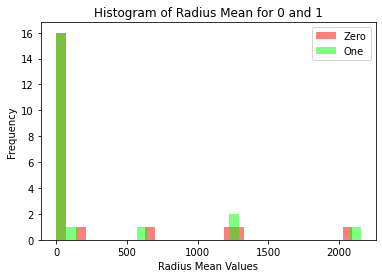

16.0
0
0.0
Most frequent malignant radius mean is:  0.0


In [14]:
m = plt.hist(data[data["blue"] == 0].mean(),bins=30,fc = (1,0,0,0.5),label = "Zero")
b = plt.hist(data[data["blue"] == 1].mean(),bins=30,fc = (0,1,0,0.5),label = "One")
#print(m,'\n',b)
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for 0 and 1")
plt.show()
frequent_malignant_radius_mean = m[0].max()
#print(frequent_malignant_radius_mean)
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
#print(index_frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

In [24]:
data_bening = data[data["blue"] == 0]
data_malignant = data[data["blue"] == 1]
desc = data_bening.mean().describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
#data_bening[data_bening.mean() < lower_bound].mean()
#print("Outliers: ",data_bening[(data_bening.mean() < lower_bound) | (data_bening.mean() > upper_bound)].mean().values)

Anything outside this range is an outlier: ( -45.66584158415842 , 77.49059405940595 )


In [26]:
melted_data = pd.melt(data,id_vars = "blue",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="blue",data= melted_data)
plt.show()

KeyError: ignored